In [58]:
import numpy as np 

In [132]:
import wave as w

class Wave():
    
    def __init__(self, waveData, framerate):
        self.waveData = waveData
        self.framerate = framerate
        self.duration = len(waveData)/framerate
        self.timeData = np.linspace(0, self.duration, len(waveData), endpoint = False)
        
    
        
    def Segment(self, start, duration):
        """
        Takes a wave, a start time, and a duration
        
        Returns a seperate wave from start to start+duration 
        
        """ 
        #multiplying frames(indexes/s) by time to get the index at a certian time 
        startIndex = round(self.framerate * start)
        
        if self.duration < start + duration:
            finishIndex = round(self.framerate * (start + duration)) + 1
        else:
            finishIndex = len(self.waveData) -1
        waveDataR = self.waveData[startIndex::finishIndex]
        framerateR = self.framerate
        waveR = Wave(waveDataR, framerateR)
        return waveR
          
        
    def Normalize(self, amp=1.0):
        """
        I took the logic in this method from allen downey, i modified it to fit my purposes 

        Normalizes a wave array so the maximum amplitude is +amp or -amp.

        
        """
        high, low = abs(max(self.waveData)), abs(min(self.waveData))
        self.waveData = amp * self.waveData / max(high, low)
        
        
def ReadWave(filename):
    """
    Logic by Allen Downey 

    Modified by Bradford Gill(very slightly)

    Reads a wave file.

    filename: string

    returns: Wave
    """
    fp = w.open(filename, 'r')

    nchannels = fp.getnchannels()
    nframes = fp.getnframes()
    sampwidth = fp.getsampwidth()
    framerate = fp.getframerate()

    z_str = fp.readframes(nframes)

    fp.close()

    dtype_map = {1:np.int8, 2:np.int16, 3:'special', 4:np.int32}
    if sampwidth not in dtype_map:
        raise ValueError('sampwidth %d unknown' % sampwidth)

    if sampwidth == 3:
        xs = np.fromstring(z_str, dtype=np.int8).astype(np.int32)
        ys = (xs[2::3] * 256 + xs[1::3]) * 256 + xs[0::3]
    else:
        ys = np.frombuffer(z_str, dtype=dtype_map[sampwidth])

    # if it's in stereo, just pull out the first channel
    if nchannels == 2:
        ys = ys[::2]

    #ts = np.arange(len(ys)) / framerate
    waveR = Wave(ys, framerate=framerate)
    waveR.Normalize()
    return waveR

    

In [133]:
#an array of all notes
notes = [16.35, 17.32, 	18.35, 	19.45, 	20.6, 	21.83, 	23.12, 	24.5, 	25.96, 	27.5, 	29.14, 	30.87, 	32.7, 	34.65, 	36.71, 	38.89, 	41.2, 	43.65, 	46.25, 	49, 	51.91, 	55, 	58.27, 	61.74, 	65.41, 	69.3, 	73.42, 	77.78, 	82.41, 	87.31, 	92.5, 	98, 	103.83, 	110, 	116.54, 	123.47, 	130.81, 	138.59, 	146.83, 	155.56, 	164.81, 	174.61, 	185, 	196, 	207.65, 	220, 	233.08, 	246.94, 	261.63, 	277.18, 	293.66, 	311.13, 	329.63, 	349.23, 	369.99, 	392, 	415.3, 	440, 	466.16, 	493.88, 	523.25, 	554.37, 	587.33, 	622.25, 	659.25, 	698.46, 	739.99, 	783.99, 	830.61, 	880, 	932.33, 	987.77, 	1046.5, 	1108.73, 	1174.66, 	1244.51, 	1318.51, 	1396.91, 	1479.98, 	1567.98, 	1661.22, 	1760, 	1864.66, 	1975.53, 	2093, 	2217.46, 	2349.32, 	2489.02, 	2637.02, 	2793.83, 	2959.96, 	3135.96, 	3322.44, 	3520, 	3729.31, 	3951.07, 	4186.01, 	4434.92, 	4698.63, 	4978.03, 	5274.04, 	5587.65, 	5919.91, 	6271.93, 	6644.88, 	7040, 	7458.62, 	7902.13] 

#returns a tuple of x and y locations of the ft visual 
def ftGraphData(wave, circleFreq):
    
    
    #getting array of theta 
    endTheta=2 * np.pi * circleFreq * wave.duration
    arrayLen=len(wave.waveData)
    theta=np.linspace(0, endTheta, arrayLen)
    
    #setting x and x to values around a circle 
    x=np.multiply(wave.waveData, np.cos(theta))
    y=np.multiply(wave.waveData, np.sin(theta))
    
    
    return x, y


#Takes in wave and the frequency to analyize and returns the center of mass of the wave analyzed and the frequency 
def CenMass(wave, freq):
    x, y = ftGraphData(wave, freq)
    
    CM_x = sum(x)/len(x)
    CM_y = sum(x)/len(x)
    
    CM = np.multiply(CM_y ,CM_y)+np.multiply(CM_x, CM_x)
    
    return CM

#takes a wave and freq then uses the threshold to detirmine if the note is prominate
#
def DetectNote(wave, freq, threshold = .003):
    CM = CenMass(wave, freq)
    present = False
    if CM > threshold: 
        present = True 
        
    return present


    
    

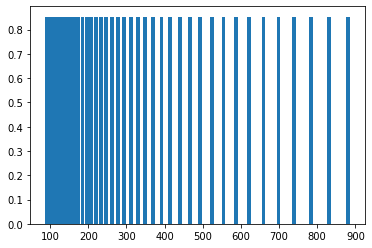

In [134]:
import matplotlib
from matplotlib import pyplot as plt 

wave = ReadWave('440.wav')
segment = wave.Segment( 1, 10)
y = []

brad = [164.81,
 174.61,
 185,
 196,
 207.65,
 220,
 233.08,
 246.94,
 261.63,
 277.18,
 293.66,
 311.13,
 329.63,
 349.23,
 369.99,
 392,
 415.3,
 440,
 466.16,
 493.88,
 523.25,
 554.37,
 587.33,
 622.25,
 659.25,
 698.46,
 739.99,
 783.99,
 830.61,
 880]

for note in notes[30:70]:
    y.append(CenMass(segment, note))
    
plt.bar(notes[30:70], y, width = 10)
plt.show()
    

In [135]:
wave = ReadWave('440.wav')
segment = wave.Segment( 1, 1)

segment.duration

2.2675736961451248e-05

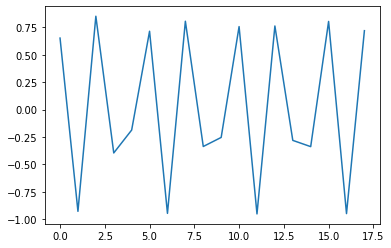

In [96]:
plt.plot(wave.waveData[round(1*wave.framerate)::round(1.04*wave.framerate)])

In [97]:
wave.timeData[44100]

0.9999999999999999

In [138]:
44100*4.1

180809.99999999997

In [139]:
wave.timeData[round(180809.99999999997)]

4.1